## Sentiment Analysis

To perform sentiment analysis I will be using <b>TextBlob</b> library. To find polarity and subjectivity of a word/phrase it uses WordNet. It outputs polarity and subjectivity of a word/phrase. 

<b>Polarity</b>: It reperesents how positive or negative a word/phrase is.  This ranges from -1 to 1.  -1 is very negative. +1 is very positive.

<b>Subjectivity</b>: It represents how subjective word/phrase is. Or in other words it represents whether a word/phrase is fact or opinion. This ranges from 0 to 1. 0 is fact. +1 is very much an opinion.

<b>Note</b>: For better visulation, I will be normalizing <b>retweets</b> and <b>favorites</b> between <b>0 to 1</b>.

##### Importing libraries

In [72]:
import pandas as pd
import matplotlib.pyplot as plt
import time
import re
import string
from textblob import TextBlob
from datetime import datetime
import calendar
import statistics

##### Loading Data

In [57]:
data_clean = pd.read_pickle('data/data_clean.pkl')
data_clean.head()

,content,date,retweets,favorites
0,be sure to tune in and watch trump on late nig...,2009-05-04 13:54:25,510,917
1,trump will be on the view tomorrow morning to ...,2009-05-04 20:00:10,34,267
2,trump top ten financial on late show with very...,2009-05-08 08:38:08,13,19
3,new post celebrity apprentice finale and learn...,2009-05-08 15:40:15,11,26
4,my persona will never be that of a wallflower ...,2009-05-12 09:07:28,1375,1945


##### Defining lambda functions for polarity and subjectivity

In [5]:
pol = lambda x : TextBlob(x).sentiment.polarity
sub = lambda x : TextBlob(x).sentiment.subjectivity

data_clean['polarity'] = data_clean['content'].apply(pol)
data_clean['subjectivity'] = data_clean['content'].apply(sub)
data_clean.head()

,content,date,retweets,favorites,polarity,subjectivity
0,be sure to tune in and watch trump on late nig...,2009-05-04 13:54:25,510,917,0.175000,0.497222
1,trump will be on the view tomorrow morning to ...,2009-05-04 20:00:10,34,267,0.136364,0.454545
2,trump top ten financial on late show with very...,2009-05-08 08:38:08,13,19,0.105000,0.420000
3,new post celebrity apprentice finale and learn...,2009-05-08 15:40:15,11,26,0.136364,0.454545
4,my persona will never be that of a wallflower ...,2009-05-12 09:07:28,1375,1945,0.000000,0.000000


##### Function to scale between 0 to 1

In [26]:
import numpy as np
def scale(X, x_min, x_max):
    nom = (X-X.min(axis=0))*(x_max-x_min)
    denom = X.max(axis=0) - X.min(axis=0)
    denom[denom==0] = 1
    return x_min + nom/denom 

##### Trump's tweet Polarity and Subjectivity from May 2009 to June 2020

Average subjectivity: 0.5474264129286105
Average polarity: 0.19636866524082555


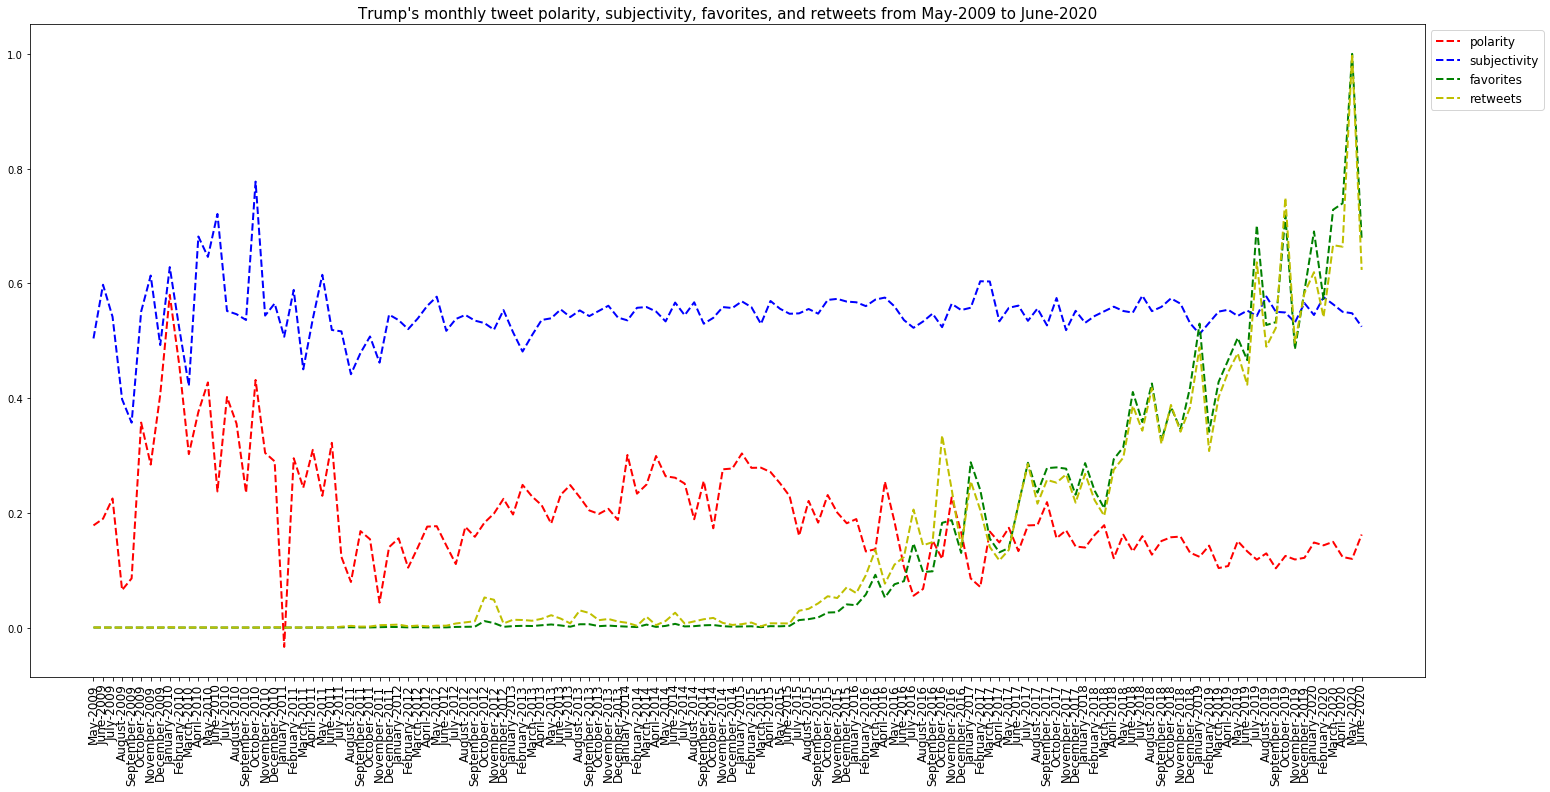

In [116]:
group = data_clean.groupby(data_clean.date.dt.year)

subjectivity_monthly = []
polarity_monthly = []
retweets_monthly = []
favorites_monthly = []
year_month = []
for year, group_data in group:
    sub_group = group_data.groupby(group_data.date.dt.month)
    for month, sub_group_data in sub_group:
        subjectivity_monthly.append(TextBlob(' '.join(sub_group_data['content'])).sentiment.subjectivity)
        polarity_monthly.append(TextBlob(' '.join(sub_group_data['content'])).sentiment.polarity)
        year_month.append(calendar.month_name[month] + '-' + str(year))
        favorites_monthly.append([sum(sub_group_data['favorites'])])
        retweets_monthly.append([sum(sub_group_data['retweets'])])

print('Average subjectivity: ' + str(statistics.mean(subjectivity_monthly)))
print('Average polarity: ' +     str(statistics.mean(polarity_monthly)))
        
plt.figure(figsize=(25,12))
plt.title("Trump's monthly tweet polarity, subjectivity, favorites, and retweets from May-2009 to June-2020", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.plot(year_month, polarity_monthly, 'r--', label="polarity", linewidth=2)
plt.plot(year_month, subjectivity_monthly, 'b--', label="subjectivity", linewidth=2)
plt.plot(year_month, scale(np.array(favorites_monthly), 0, 1), 'g--', label="favorites", linewidth=2)
plt.plot(year_month, scale(np.array(retweets_monthly), 0, 1), 'y--', label="retweets", linewidth=2)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.savefig('plots/3_sentiment_2009_2021.jpg')

##### Trump's tweet Polarity and Subjectivity during Obama's Term 1

Obama's Term 1: Jan-2009 to Jan 2013

In [7]:
obama_term1 = datetime(2009, 1, 19, 23, 55, 59)
obama_term2 = datetime(2013, 1, 19 , 23, 55, 59)
trump_term = datetime(2017, 1, 19, 23, 55, 59)

Average subjectivity: 0.5412010654224536
Average polarity: 0.23150649832782513


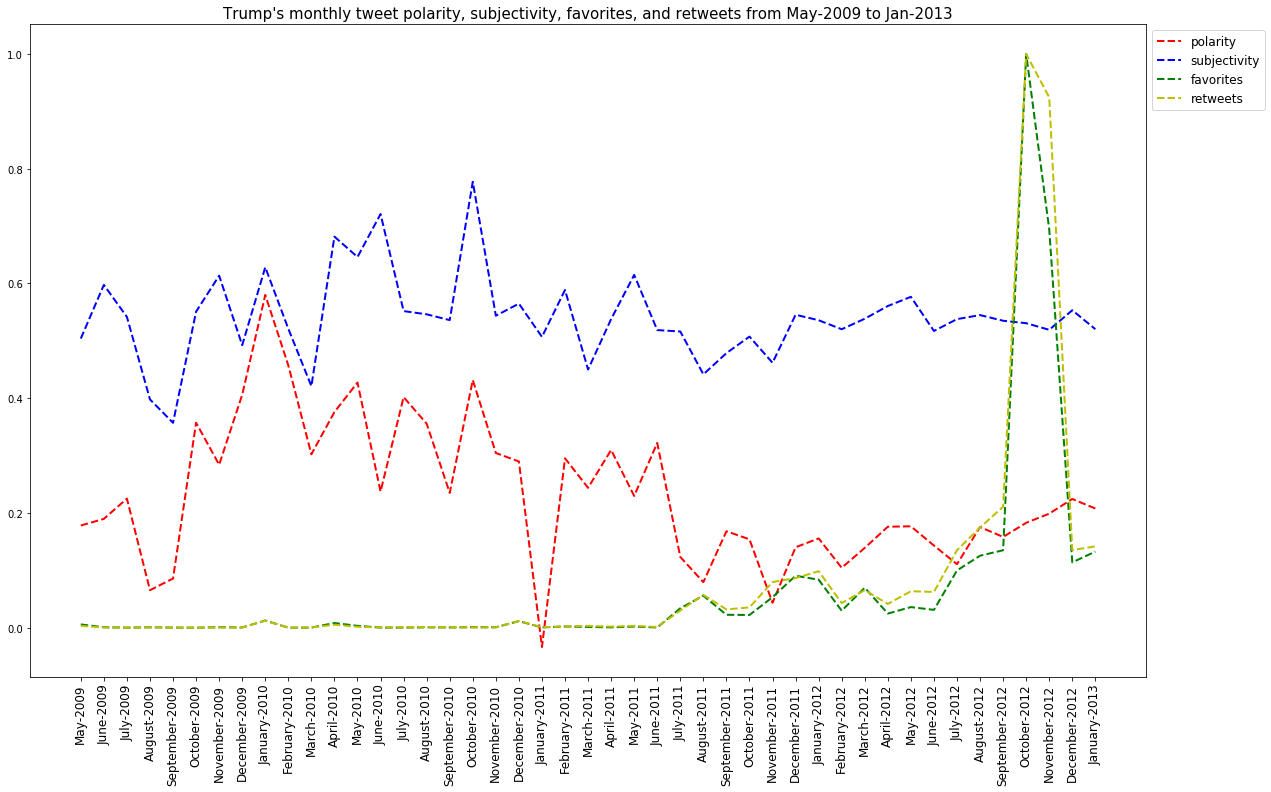

In [115]:
data_obama_term1 = data_clean.loc[(pd.DatetimeIndex(data_clean['date']) >= obama_term1) & (pd.DatetimeIndex(data_clean['date']) <= obama_term2)]

group_obama_term1 = data_obama_term1.groupby(data_obama_term1.date.dt.year)

subjectivity_monthly = []
polarity_monthly = []
retweets_monthly = []
favorites_monthly = []
year_month = []

for year, group_data in group_obama_term1:
    sub_group = group_data.groupby(group_data.date.dt.month)
    for month, sub_group_data in sub_group:
        subjectivity_monthly.append(TextBlob(' '.join(sub_group_data['content'])).sentiment.subjectivity)
        polarity_monthly.append(TextBlob(' '.join(sub_group_data['content'])).sentiment.polarity)
        year_month.append(calendar.month_name[month] + '-' + str(year))
        favorites_monthly.append([sum(sub_group_data['favorites'])])
        retweets_monthly.append([sum(sub_group_data['retweets'])])
        
print('Average subjectivity: ' + str(statistics.mean(subjectivity_monthly)))
print('Average polarity: ' +     str(statistics.mean(polarity_monthly)))

plt.figure(figsize=(20,12))
plt.title("Trump's monthly tweet polarity, subjectivity, favorites, and retweets from May-2009 to Jan-2013", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.plot(year_month, polarity_monthly, 'r--', label="polarity", linewidth=2)
plt.plot(year_month, subjectivity_monthly, 'b--', label="subjectivity", linewidth=2)
plt.plot(year_month, scale(np.array(favorites_monthly), 0, 1), 'g--', label="favorites", linewidth=2)
plt.plot(year_month, scale(np.array(retweets_monthly), 0, 1), 'y--', label="retweets", linewidth=2)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.savefig('plots/3_sentiment_2009_2013.jpg')

##### Trump's tweet Polarity and Subjectivity during Obama's Term 2

Obama's Term 2: Jan-2013 to Jan 2017

Average subjectivity: 0.5488180168065161
Average polarity: 0.20928548782410758


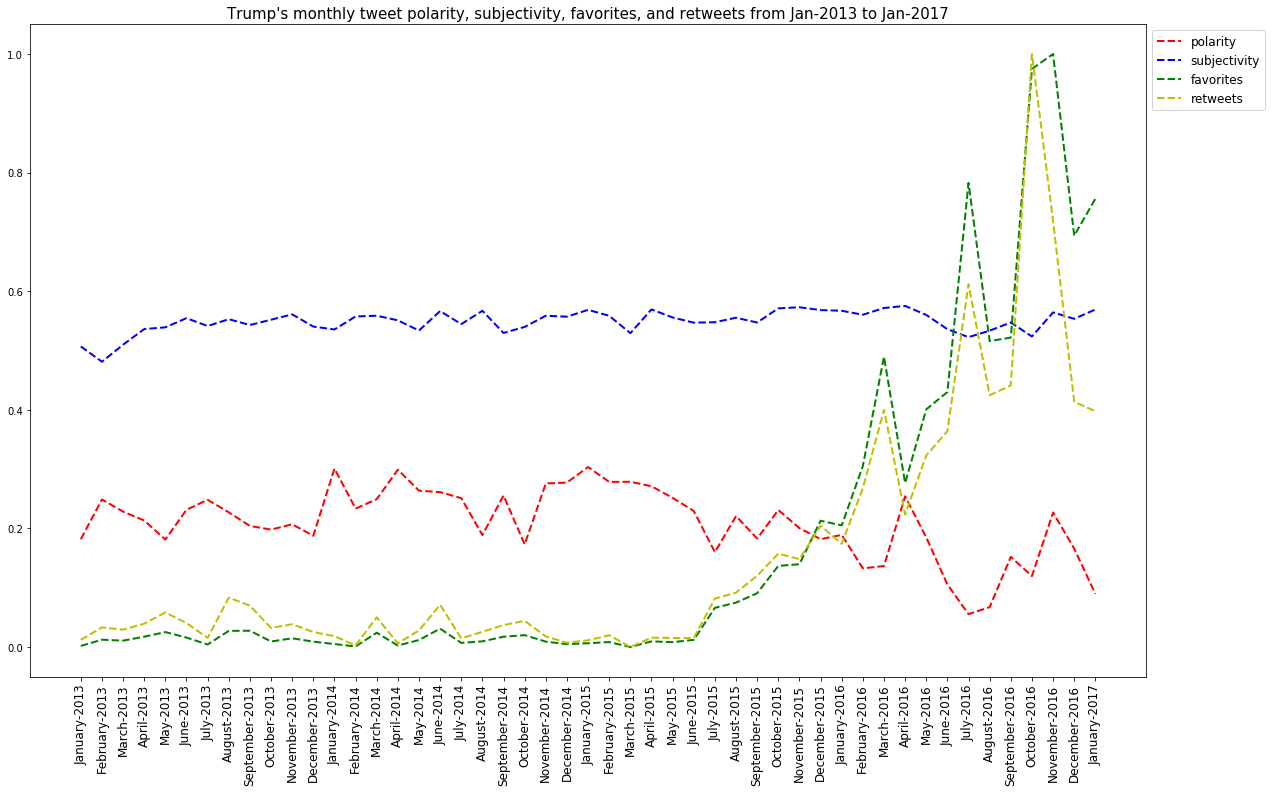

In [114]:
data_obama_term2 = data_clean.loc[(pd.DatetimeIndex(data_clean['date']) >= obama_term2) & (pd.DatetimeIndex(data_clean['date']) <= trump_term)]

group_obama_term2 = data_obama_term2.groupby(data_obama_term2.date.dt.year)

subjectivity_monthly = []
polarity_monthly = []
retweets_monthly = []
favorites_monthly = []
year_month = []

for year, group_data in group_obama_term2:
    sub_group = group_data.groupby(group_data.date.dt.month)
    for month, sub_group_data in sub_group:
        subjectivity_monthly.append(TextBlob(' '.join(sub_group_data['content'])).sentiment.subjectivity)
        polarity_monthly.append(TextBlob(' '.join(sub_group_data['content'])).sentiment.polarity)
        year_month.append(calendar.month_name[month] + '-' + str(year))
        favorites_monthly.append([sum(sub_group_data['favorites'])])
        retweets_monthly.append([sum(sub_group_data['retweets'])])

print('Average subjectivity: ' + str(statistics.mean(subjectivity_monthly)))
print('Average polarity: ' +     str(statistics.mean(polarity_monthly)))

plt.figure(figsize=(20,12))
plt.title("Trump's monthly tweet polarity, subjectivity, favorites, and retweets from Jan-2013 to Jan-2017", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.plot(year_month, polarity_monthly, 'r--', label="polarity", linewidth=2)
plt.plot(year_month, subjectivity_monthly, 'b--', label="subjectivity", linewidth=2)
plt.plot(year_month, scale(np.array(favorites_monthly), 0, 1), 'g--', label="favorites", linewidth=2)
plt.plot(year_month, scale(np.array(retweets_monthly), 0, 1), 'y--', label="retweets", linewidth=2)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.savefig('plots/3_sentiment_2013_2017.jpg')

#### Trump's tweet Polarity and Subjectivity during his own term

Trump's term Jan-2017 to Jan 2021

Average subjectivity: 0.5515150472366003
Average polarity: 0.14079859789732693


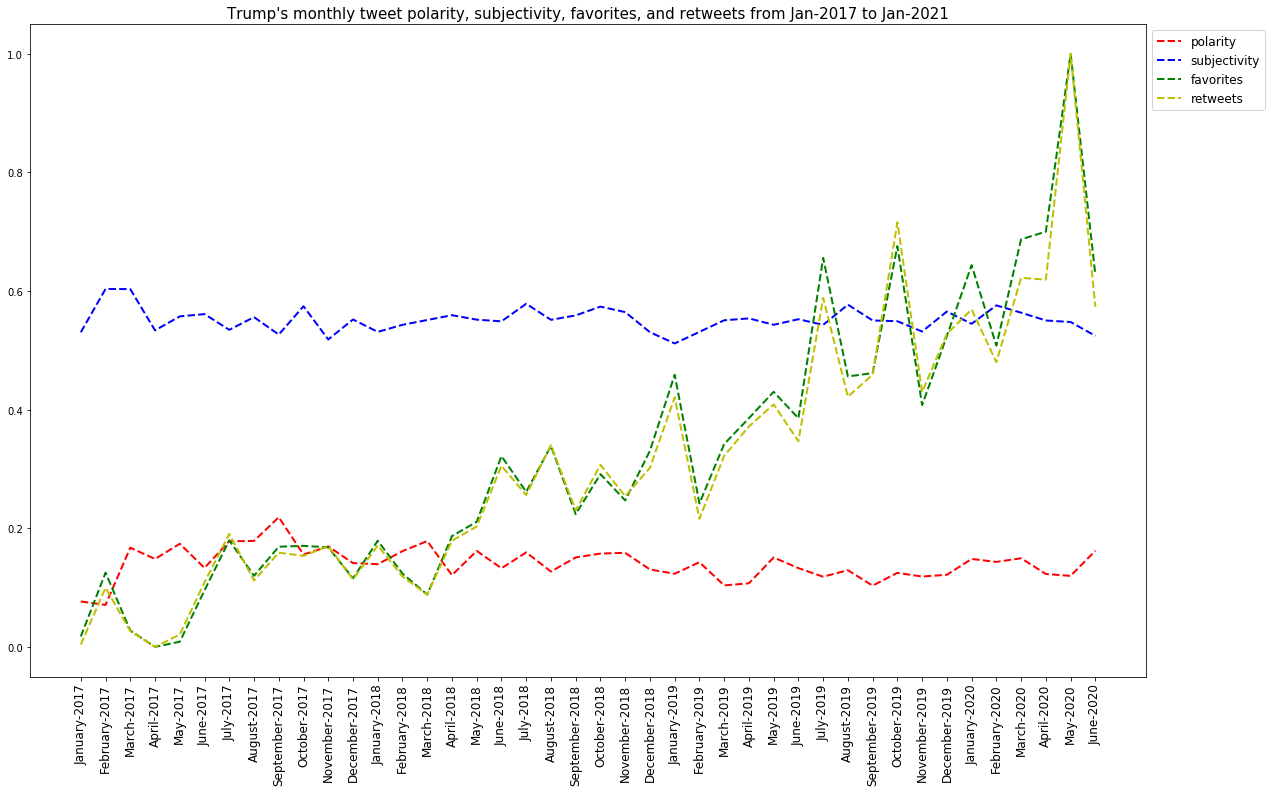

In [113]:
data_trump_term = data_clean.loc[(pd.DatetimeIndex(data_clean['date']) >= trump_term)]

group_trump_term = data_trump_term.groupby(data_trump_term.date.dt.year)

subjectivity_monthly = []
polarity_monthly = []
retweets_monthly = []
favorites_monthly = []
year_month = []

for year, group_data in group_trump_term:
    sub_group = group_data.groupby(group_data.date.dt.month)
    for month, sub_group_data in sub_group:
        subjectivity_monthly.append(TextBlob(' '.join(sub_group_data['content'])).sentiment.subjectivity)
        polarity_monthly.append(TextBlob(' '.join(sub_group_data['content'])).sentiment.polarity)
        year_month.append(calendar.month_name[month] + '-' + str(year))
        favorites_monthly.append([sum(sub_group_data['favorites'])])
        retweets_monthly.append([sum(sub_group_data['retweets'])])

print('Average subjectivity: ' + str(statistics.mean(subjectivity_monthly)))
print('Average polarity: ' +     str(statistics.mean(polarity_monthly)))

plt.figure(figsize=(20,12))
plt.title("Trump's monthly tweet polarity, subjectivity, favorites, and retweets from Jan-2017 to Jan-2021", fontsize=15)
plt.xticks(rotation=90, fontsize=12)
plt.plot(year_month, polarity_monthly, 'r--', label="polarity", linewidth=2)
plt.plot(year_month, subjectivity_monthly, 'b--', label="subjectivity", linewidth=2)
plt.plot(year_month, scale(np.array(favorites_monthly), 0, 1), 'g--', label="favorites", linewidth=2)
plt.plot(year_month, scale(np.array(retweets_monthly), 0, 1), 'y--', label="retweets", linewidth=2)
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', fontsize=12)
plt.savefig('plots/3_sentiment_2017_2021.jpg')

### Results

<b>Polarity</b>
* <b>During Obama's Term 1</b>: Jan-20013 to Jan 2017
    * Polarity sometimes went quite positive and negative from time to time.
    * Polarity of tweets varied significantly during this period.
* <b>During Obama's Term 2</b>: Jan-2013 to Jan 2017
    * Polarity during this period has been quite low. 
    * Polarity of tweets varied slightly during this period.
* <b>During Trump's Term</b>: Jan-2017 to Jan 2021
    * Polarity during this period has been the lowest. 
    * Polarity didn't go above 0.2 which means tweets weren't really positive.
    * And, the polarity of tweets was almost constant.

<b>Subjectivity</b>
* <b>During Obama's Term 1</b>: Jan-20013 to Jan 2017
    * Subjectivity varied significantly during this period.
* <b>During Obama's Term 2</b>: Jan-2013 to Jan 2017
    * Subjectivity has been constant during this period and was mostly around 0.5.
* <b>During Trump's Term</b>: Jan-2017 to Jan 2021
    * Subjectivity has been constant during this period and was mostly around 0.5.


<b>Favorites and retweets</b>
* The graph above clearly depicts that retweets and favorites has basically nothing to do with subjectivity and polarity. 
* It can also be said that, as Trump's followers grew with his popularity over the time, which inturn resulted in the increase in the number of retweets and favorites.